# Exploring the Pokemon Dataset

**SETUP**

In [5]:
#importing relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


**CHECKING INPUT DATA**

In [244]:
#Reading the csv file and printing first few rows of data
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The name after Venusaur looks sus and also has the wrong value in the '#' column.

Hmm. We'll check out the 'Name' and the '#' columns and see if this is something that's happening throughout.

**WORKING WITH 'NAME' COLUMN**

In [245]:
#Display all row instead of just the first and last few
pd.set_option('display.max_rows', None)

#Checking out the 'Name and '#' column values
print(df[['#', 'Name']])

       #                       Name
0      1                  Bulbasaur
1      2                    Ivysaur
2      3                   Venusaur
3      3      VenusaurMega Venusaur
4      4                 Charmander
5      5                 Charmeleon
6      6                  Charizard
7      6  CharizardMega Charizard X
8      6  CharizardMega Charizard Y
9      7                   Squirtle
10     8                  Wartortle
11     9                  Blastoise
12     9    BlastoiseMega Blastoise
13    10                   Caterpie
14    11                    Metapod
15    12                 Butterfree
16    13                     Weedle
17    14                     Kakuna
18    15                   Beedrill
19    15      BeedrillMega Beedrill
20    16                     Pidgey
21    17                  Pidgeotto
22    18                    Pidgeot
23    18        PidgeotMega Pidgeot
24    19                    Rattata
25    20                   Raticate
26    21                    

Okay. Clearly, the names have issues in them. And it seems to be specifically ones with two words in them.

For ease and clarity, let's just first look at all names which have two words in them. And then, we'll see how to procees.

In [246]:
#Seeing all the problem names in them (ones with two words)
df.loc[df['Name'].str.contains(pat = r'(\w+) (\w+)', regex = True)]

/var/folders/np/5d_gm6q11dlc32r4d3xqjbg00000gn/T/ipykernel_22089/1097548692.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Name'].str.contains(pat = r'(\w+) (\w+)', regex = True)]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


Awesome. Right off the bat, we see that all Pokemon with 'Mega' in their name have a redundant name at the beginning. Let's remove that.

In [247]:
#Removing redundant name in names with 'Mega'
df['Name'] = df['Name'].replace(to_replace = r'(\w+)(Mega)',value = r'\2', regex = True)

#Check to see if all of them are fixed
df.loc[df['Name'].str.contains('Mega')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,Mega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,Mega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,Mega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,Mega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,Mega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [248]:
#Looking up the column again to see what to fix next
df['Name']

0                     Bulbasaur
1                       Ivysaur
2                      Venusaur
3                 Mega Venusaur
4                    Charmander
5                    Charmeleon
6                     Charizard
7              Mega Charizard X
8              Mega Charizard Y
9                      Squirtle
10                    Wartortle
11                    Blastoise
12               Mega Blastoise
13                     Caterpie
14                      Metapod
15                   Butterfree
16                       Weedle
17                       Kakuna
18                     Beedrill
19                Mega Beedrill
20                       Pidgey
21                    Pidgeotto
22                      Pidgeot
23                 Mega Pidgeot
24                      Rattata
25                     Raticate
26                      Spearow
27                       Fearow
28                        Ekans
29                        Arbok
30                      Pikachu
31      

Great! The 'Mega' Pokemon are all good. 

On scrolling through the 'Name' column, we also see that two Pokemon with 'Primal' in their name have the same issue. Let's fix that up too.

In [249]:
#Removing redundant name in names with 'Primal'
df['Name'] = df['Name'].replace(to_replace = r'(\w+)(Primal)', value = r'\2', regex = True)

#Check to see if all of them are fixed
df.loc[df['Name'].str.contains('Primal')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


Great! The 'Primal' Pokemon are fixed too.

Let's see what to do next.

In [250]:
df['Name']

0                     Bulbasaur
1                       Ivysaur
2                      Venusaur
3                 Mega Venusaur
4                    Charmander
5                    Charmeleon
6                     Charizard
7              Mega Charizard X
8              Mega Charizard Y
9                      Squirtle
10                    Wartortle
11                    Blastoise
12               Mega Blastoise
13                     Caterpie
14                      Metapod
15                   Butterfree
16                       Weedle
17                       Kakuna
18                     Beedrill
19                Mega Beedrill
20                       Pidgey
21                    Pidgeotto
22                      Pidgeot
23                 Mega Pidgeot
24                      Rattata
25                     Raticate
26                      Spearow
27                       Fearow
28                        Ekans
29                        Arbok
30                      Pikachu
31      

Okay. So there's one more Pokemon which seems to have it's name repeating at the beginning and the end - 'Rotom'. And it also seems like there are many Pokemon who's names have their first word as a concatenation of two words, alongwith one that has a concatenation of a word and some numbers (Zygarde50% Forme). 

Let's quickly fix the Rotoms up before moving on to split the names where there is a concatenation of words.

In [251]:
#Replace 
df['Name'] = df['Name'].replace(to_replace = r'(Rotom)([A-Z])', value = r'\2', regex = True)

#Check to see if this fixed all Rotom Pokemon names
df.loc[df['Name'].str.contains('Rotom')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,Heat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,Wash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,Frost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,Fan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,Mow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


Amazing!! Finally, let's fix those Pokemon who's first name is a concatenation of two words by adding a space in between them.

In [252]:
#Add space in between the words
df['Name'] = df['Name'].replace(to_replace = r'([a-z])([A-Z]|\d)', value = r'\1 \2', regex = True)

#Check the dataset
df.loc[df['Name'].str.contains(r'([a-z]) ([A-Z]|\d)', regex = True)]

/var/folders/np/5d_gm6q11dlc32r4d3xqjbg00000gn/T/ipykernel_22089/597756562.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Name'].str.contains(r'([a-z]) ([A-Z]|\d)', regex = True)]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,Mega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,Mega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,Mega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,Mega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,Mega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


Oh it looks like there's another Pokemon with a duplicate name : 'Kyurem Black Kyurem' and 'Kyurem White Kyurem'. That needs fixing.

Also, after a quick internet search, apparently 'Hoopa Hoopa Confined' and 'Hoopa Hoopa Unbound' are just 'Hoopa Confined' and 'Hoopa Unbound'. 

Let's fix all this.

In [254]:
#Fixing Kyurem
df['Name'] = df['Name'].replace(to_replace = r'(Kyurem) ([A-Z])', value = r'\2', regex = True)

#Fixing Hoopa
df['Name'] = df['Name'].replace(to_replace = r'(Hoopa) (Hoopa)', value = r'\2', regex = True)

In [255]:
#Final look (hopefully)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


AMAZING! All Pokemon names have been fixed. We can move on now.

**CHECKING FOR DUPLICATES AND REASSIGNING INDEX**

In [ ]:
#Continue from here.

In [12]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [97]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [33]:

#Check to see if there are any null values
df .isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Trying Out Stuff - Dropping Columns**

In [34]:
#Dropping columns

df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [35]:
df.drop(['Type 1', 'Type 2'], axis = 1)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,405,60,62,63,80,80,60,1,False
2,3,Venusaur,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False
4,4,Charmander,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,680,80,160,60,170,130,80,6,True


**Trying Out Stuff - Indexing**

In [45]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [44]:
#Indexing
df.iloc[0, 2]

'Grass'

In [46]:
df.loc[0, 'Type 1']

'Grass'

**Trying Out Stuff - Finding Frequencies**

In [83]:
df[['Name', 'Type 1']].isnull().sum()

Name      0
Type 1    0
dtype: int64

In [59]:
df['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

**Trying Out Stuff - Plotting Values**

<Axes: title={'center': 'Types of Pokemon'}, ylabel='count'>

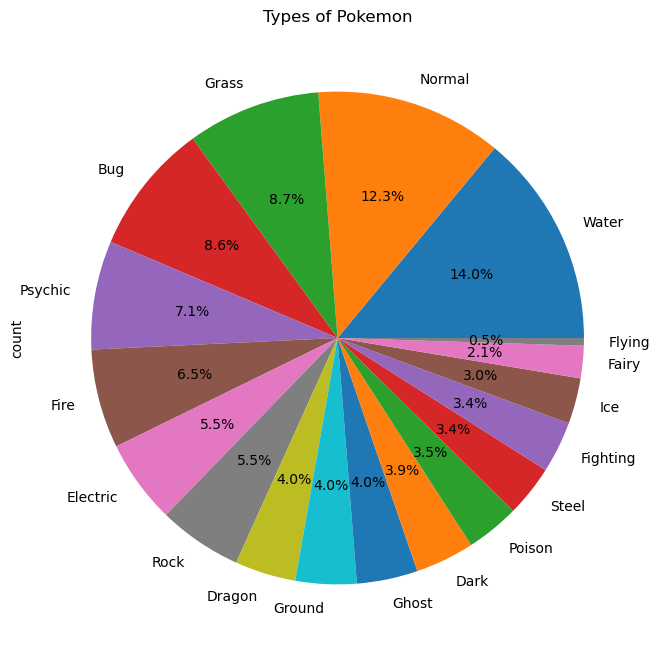

In [79]:
#Plotting distributions of the types of Pokemon
df['Type 1'].value_counts().plot(kind = 'pie', title = 'Types of Pokemon', autopct = '%1.1f%%', figsize = (10, 8))

In [86]:
df['Total'].isnull().sum()

0

In [107]:
df[(df['Total'] < 480) & (df['Total'] >= 400)].shape

(166, 13)

<Axes: ylabel='Frequency'>

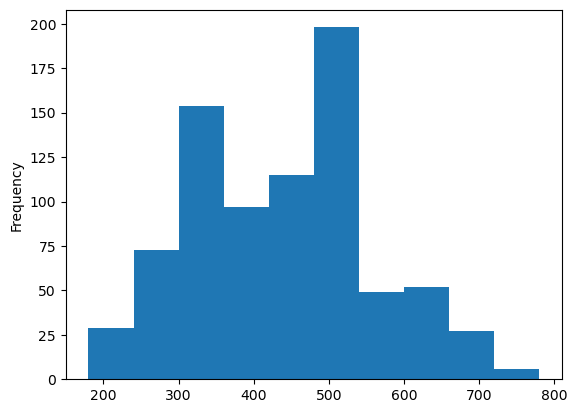

In [92]:
df['Total'].plot(kind = 'hist')